In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt
import calendar
from sqlalchemy import extract  

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#dir(Measurement)

In [9]:
inspector = inspect(engine)
measurement_c = inspector.get_columns('Measurement')
for c in measurement_c:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
station_c = inspector.get_columns('Station')
for c in station_c:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Calculate the date 1 year ago from the last data point in the database
current_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
print(f"The Current Date is: {current_date}")

previous_date = dt.datetime(2016, 8, 23)
current_date = dt.datetime(2017, 8, 23)

print(f"The Previous Date is: {previous_date}")

The Current Date is: ('2017-08-23',)
The Previous Date is: 2016-08-23 00:00:00


In [13]:
prcp = session.query(func.avg(Measurement.prcp), Measurement.date).\
    filter(Measurement.date > previous_date).\
    group_by(Measurement.date).all()
prcp

[(1.5549999999999997, '2016-08-24'),
 (0.07714285714285715, '2016-08-25'),
 (0.016666666666666666, '2016-08-26'),
 (0.06399999999999999, '2016-08-27'),
 (0.5166666666666666, '2016-08-28'),
 (0.24333333333333332, '2016-08-29'),
 (0.011666666666666667, '2016-08-30'),
 (0.6359999999999999, '2016-08-31'),
 (0.006, '2016-09-01'),
 (0.05, '2016-09-02'),
 (0.254, '2016-09-03'),
 (0.276, '2016-09-04'),
 (0.08499999999999999, '2016-09-05'),
 (0.246, '2016-09-06'),
 (0.3333333333333333, '2016-09-07'),
 (0.07666666666666667, '2016-09-08'),
 (0.17833333333333332, '2016-09-09'),
 (0.27999999999999997, '2016-09-10'),
 (0.25, '2016-09-11'),
 (0.308, '2016-09-12'),
 (0.45166666666666666, '2016-09-13'),
 (2.3800000000000003, '2016-09-14'),
 (0.8266666666666667, '2016-09-15'),
 (0.11714285714285715, '2016-09-16'),
 (0.13599999999999998, '2016-09-17'),
 (0.10600000000000001, '2016-09-18'),
 (0.064, '2016-09-19'),
 (0.14714285714285716, '2016-09-20'),
 (0.19499999999999998, '2016-09-21'),
 (0.205714285714

In [14]:
prcp_list = []

for number, date in prcp:
    prcp_list.append({f"{date}": number})
    
prcp_list

[{'2016-08-24': 1.5549999999999997},
 {'2016-08-25': 0.07714285714285715},
 {'2016-08-26': 0.016666666666666666},
 {'2016-08-27': 0.06399999999999999},
 {'2016-08-28': 0.5166666666666666},
 {'2016-08-29': 0.24333333333333332},
 {'2016-08-30': 0.011666666666666667},
 {'2016-08-31': 0.6359999999999999},
 {'2016-09-01': 0.006},
 {'2016-09-02': 0.05},
 {'2016-09-03': 0.254},
 {'2016-09-04': 0.276},
 {'2016-09-05': 0.08499999999999999},
 {'2016-09-06': 0.246},
 {'2016-09-07': 0.3333333333333333},
 {'2016-09-08': 0.07666666666666667},
 {'2016-09-09': 0.17833333333333332},
 {'2016-09-10': 0.27999999999999997},
 {'2016-09-11': 0.25},
 {'2016-09-12': 0.308},
 {'2016-09-13': 0.45166666666666666},
 {'2016-09-14': 2.3800000000000003},
 {'2016-09-15': 0.8266666666666667},
 {'2016-09-16': 0.11714285714285715},
 {'2016-09-17': 0.13599999999999998},
 {'2016-09-18': 0.10600000000000001},
 {'2016-09-19': 0.064},
 {'2016-09-20': 0.14714285714285716},
 {'2016-09-21': 0.19499999999999998},
 {'2016-09-22': 

In [15]:
prcp_df = pd.DataFrame(prcp, columns =['Prcp', 'Date']).set_index("Date")
prcp_df.head()

,Prcp
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


/Users/jenniferdean/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

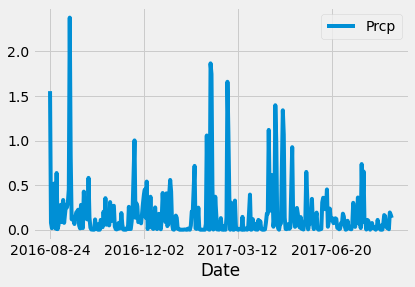

In [16]:
prcp_df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [19]:
# List the stations and the counts in descending order.

session.query(Station.station, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS) for the most active station.
tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > previous_date).all()

In [22]:
tobs

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [23]:
tob_list = []

for tob in tobs:
    tob_list.append(tob[0])

#tob_list = [tob[0] for tob in tobs]
    
tob_list

[77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

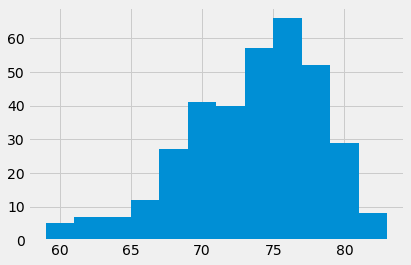

In [24]:
plt.hist(tob_list, bins=12)

In [28]:
#Using the station id from the previous query, calculate the lowest temperature recorded,

#highest temperature recorded, and average temperature of the most active station?

station_min_tobs = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all() 
station_max_tobs = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
station_avg_tobs = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(station_min_tobs)
print(station_max_tobs)
print(station_avg_tobs)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [29]:
#When given the start date only, calculate min, max, and avg for all dates greater than and equal to the start date.

#date = start

date = "2016-08-10"

min_tobs = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date <= date).all()
avg_tobs = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date <= date).all()
max_tobs = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date <= date).all()

print(min_tobs)
print(avg_tobs)
print(max_tobs)

[(53.0,)]
[(72.88308299019891,)]
[(87.0,)]


In [30]:
#When given the start and the end date, calculate the min, avg, and max for dates between the start and end date inclusive.

#date_s = start
#date_e = end

date_s = "2016-08-20"
date_e = "2016-09-20"

min_tobs = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date <= date_e).\
    filter(Measurement.date >= date_s).all()
avg_tobs = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date <= date_e).\
    filter(Measurement.date >= date_s).all()
max_tobs = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.date <= date_e).\
    filter(Measurement.date >= date_s).all()

print(min_tobs)
print(avg_tobs)
print(max_tobs)

[(70.0,)]
[(77.74626865671642,)]
[(84.0,)]


## Bonus Challenge Assignment

In [38]:
jun_avg = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

dec_avg = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [42]:
jun_avg

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (82.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (73.0),
 (70.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (78.0),
 (76.0),
 (77.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (77.0),
 (77.0),
 (76.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (73.0),
 (75.0),
 (77.0),
 (76.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (79.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (73.0),
 (76.0),
 (77.0),
 (75.0),
 (76.0),
 (74.0),
 

In [43]:
dec_avg

[(76.0),
 (74.0),
 (74.0),
 (64.0),
 (64.0),
 (67.0),
 (77.0),
 (66.0),
 (69.0),
 (68.0),
 (68.0),
 (71.0),
 (74.0),
 (67.0),
 (66.0),
 (69.0),
 (71.0),
 (70.0),
 (70.0),
 (74.0),
 (74.0),
 (71.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (68.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (73.0),
 (71.0),
 (73.0),
 (73.0),
 (77.0),
 (72.0),
 (71.0),
 (73.0),
 (70.0),
 (73.0),
 (69.0),
 (74.0),
 (72.0),
 (71.0),
 (72.0),
 (72.0),
 (70.0),
 (73.0),
 (73.0),
 (72.0),
 (73.0),
 (73.0),
 (72.0),
 (63.0),
 (65.0),
 (71.0),
 (76.0),
 (70.0),
 (76.0),
 (69.0),
 (69.0),
 (69.0),
 (74.0),
 (76.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (71.0),
 (73.0),
 (72.0),
 (64.0),
 (66.0),
 (73.0),
 (72.0),
 (65.0),
 (64.0),
 (69.0),
 (68.0),
 (77.0),
 (71.0),
 (71.0),
 (69.0),
 (68.0),
 (68.0),
 (69.0),
 (70.0),
 (72.0),
 (76.0),
 (75.0),
 (69.0),
 (71.0),
 (71.0),
 (71.0),
 (68.0),
 (65.0),
 (70.0),
 (69.0),
 (69.0),
 (71.0),
 (67.0),
 (73.0),
 (74.0),
 (73.0),
 

In [44]:
sts.ttest_ind(jun_avg, dec_avg, equal_var=False)

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

less then 0.05 = less meaningful distinction in data set // there is a difference in the data. 

In [45]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d 
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-08-13', '2017-08-23'))

[(70.0, 78.71111111111111, 85.0)]


In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-13', '2016-08-23'))

[(72.0, 78.08571428571429, 83.0)]


In [47]:
current_query = calc_temps('2017-08-13', '2017-08-23')
old_query = calc_temps('2016-08-13', '2016-08-23')

current_query_df = pd.DataFrame(current_query, columns =['TMIN','TAVE','TMAX'])
current_query_df.head()

old_query_df = pd.DataFrame(old_query, columns =['TMIN','TAVE','TMAX'])
old_query_df.head()

,TMIN,TAVE,TMAX
0,72.0,78.085714,83.0


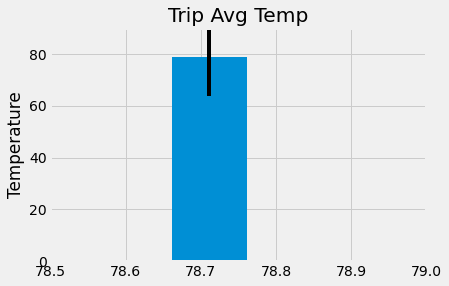

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(current_query_df['TAVE'], current_query_df['TAVE'],
        yerr = (current_query_df['TMAX']-current_query_df['TMIN']),
       width=0.1)
plt.axis([78.5,79,0,90])
plt.ylabel("Temperature")
plt.title("Trip Avg Temp")
plt.show()

In [57]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.

    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")[0][1]

69.15384615384616

In [59]:
# Loop through the list of %m-%d strings and calculate the normals for each date

day = 13

tmin_list = []
tavg_list = []
tmax_list = []

day_list = []

while day < 24:
    result = daily_normals(f"08-{day}")
    day_list.append(f"08-{day}")
    tmin_list.append(result[0][0])
    tavg_list.append(result[0][1])
    tmax_list.append(result[0][2])
    day = day+1
    
tmin_list

[71.0, 71.0, 69.0, 69.0, 69.0, 70.0, 69.0, 68.0, 67.0, 69.0, 67.0]

In [60]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_list_df = pd.DataFrame(
    {"Date":day_list,
     "Temp Min": tmin_list,
     "Temp Avg": tavg_list,
     "Temp Max": tmax_list
})
daily_list_df

,Date,Temp Min,Temp Avg,Temp Max
0,08-13,71.0,76.982456,84.0
1,08-14,71.0,76.777778,82.0
2,08-15,69.0,76.471698,83.0
3,08-16,69.0,76.080000,83.0
4,08-17,69.0,76.125000,83.0
5,08-18,70.0,76.923077,84.0
6,08-19,69.0,75.946429,85.0
7,08-20,68.0,76.452830,82.0
8,08-21,67.0,76.400000,83.0
9,08-22,69.0,76.471698,84.0


Text(0.5, 0, 'Date')

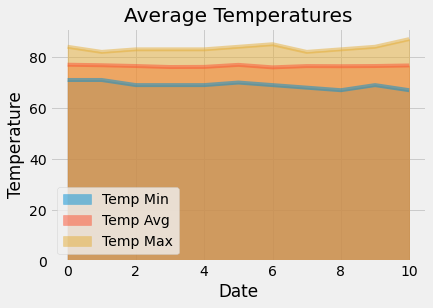

In [62]:
# Plot the daily normals as an area plot with `stacked=False`
daily_list_df.plot.area(stacked=False)
plt.title("Average Temperatures")
plt.ylabel("Temperature")
plt.xlabel("Date")

## New heading

## New heading